In [7]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr

In [8]:
### simulate a brownian motion with target annualized volatility

def simul_BrownianMotion(T, n, S0, mu, d, sigma): 
    bm = np.cumsum(nr.randn(n)) * np.sqrt(T/n) 
    dates = np.arange(1, n+1) * (T/n)#?
    St = S0 * np.exp((mu - d - 0.5 * sigma * sigma) * dates + sigma * bm)
   
    return dates, St

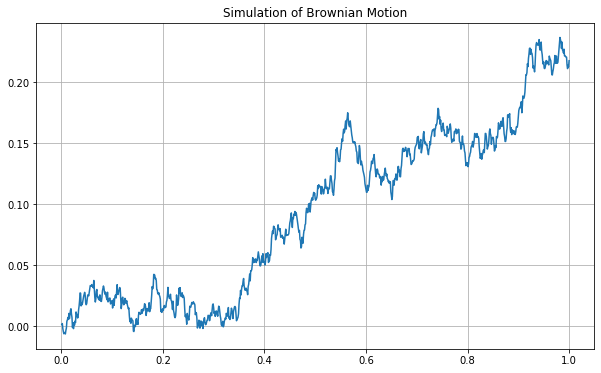

In [11]:
dates, St = simul_BrownianMotion(1, 1000, 1.0, 0.0, 0.00, 0.12)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(dates, np.log(St)) ## Normal distribution
plt.title('Simulation of Brownian Motion')
plt.show()

In [12]:
### Estimate the price of call option with Monte-Carlo

def calculateCallPrice(K, T, n, S0, mu, d, sigma):
    payoff_vect = np.full(10000, 0.0)
    for i in range(10000):
        dates, St = simul_BrownianMotion(T, n, S0, mu, d, sigma)
        payoff  = np.max([(St[-1]-K),  0])
        payoff_vect[i] = payoff
    
    return payoff_vect

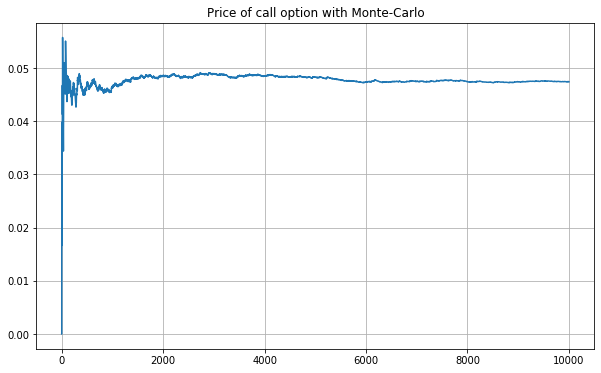

In [14]:
payoff_vect = calculateCallPrice(1, 1, 10000, 1.0, 0.0, 0.0, 0.12)
timStamps = np.arange(1, len(payoff_vect)+1)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(timStamps, np.cumsum(payoff_vect) / timStamps)
## computing an average to show that after certain point the call price converges to its theoretical value
plt.title('Price of call option with Monte-Carlo')
plt.show()